In [2]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from tensorflow.keras.layers import Lambda
from keras import backend as K
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy

In [3]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_X1 = train_X[0:100]
train_Y1 = train_Y[:100]
val_X = train_X[100:150]
val_Y_Onehot = to_categorical(train_Y[100:150])
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.1104 - loss: 2.2764 - val_accuracy: 0.1400 - val_loss: 2.2738
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.2833 - loss: 2.0817 - val_accuracy: 0.1400 - val_loss: 2.2073
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2981 - loss: 1.9191 - val_accuracy: 0.4000 - val_loss: 2.0253
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4487 - loss: 1.7266 - val_accuracy: 0.5400 - val_loss: 1.8192
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6550 - loss: 1.4943 - val_accuracy: 0.5800 - val_loss: 1.6635
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6906 - loss: 1.2882 - val_accuracy: 0.6000 - val_loss: 1.4773
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7879 - loss: 1.0345 - val_accuracy: 0.7000 - val_loss: 1.2292
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.7819 - loss: 0.8968 - val_accuracy: 0.6400 - v

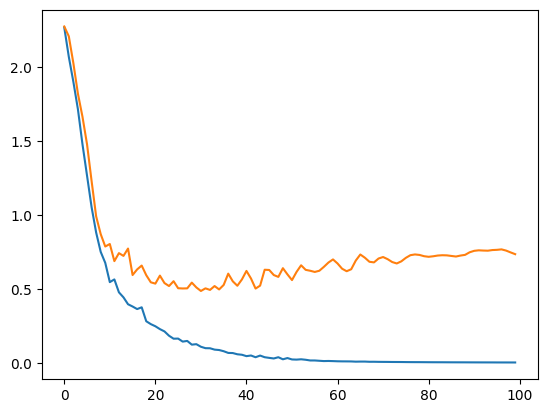

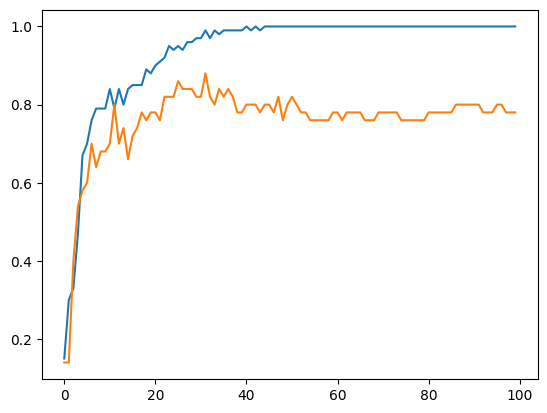

In [5]:
history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=100, validation_data=(val_X,val_Y_Onehot))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [6]:
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6980 - loss: 1.8137

Keras CNN binary accuracy: 0.6800000071525574 



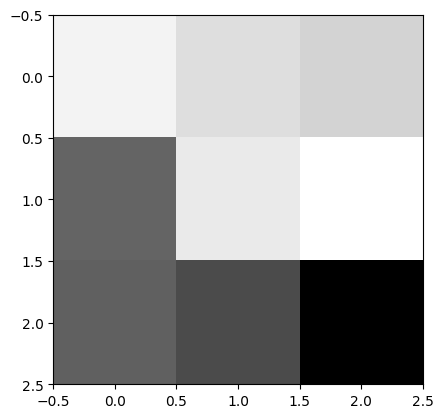

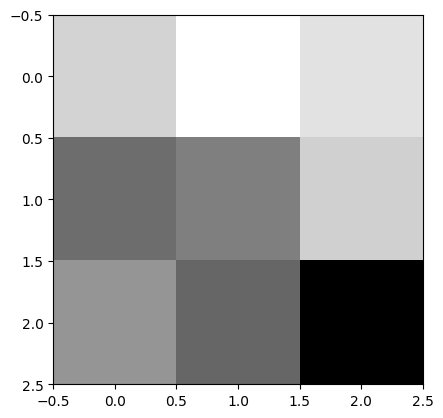

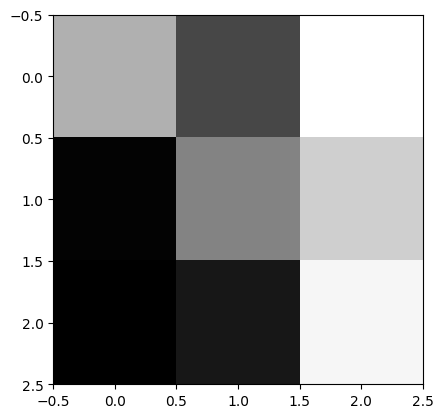

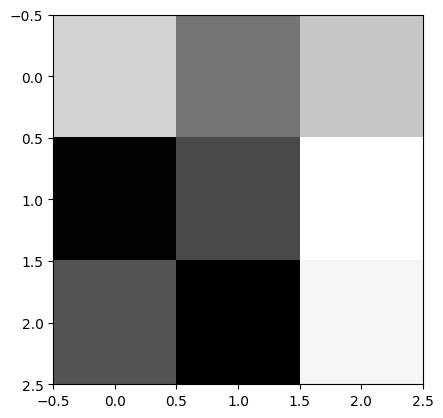

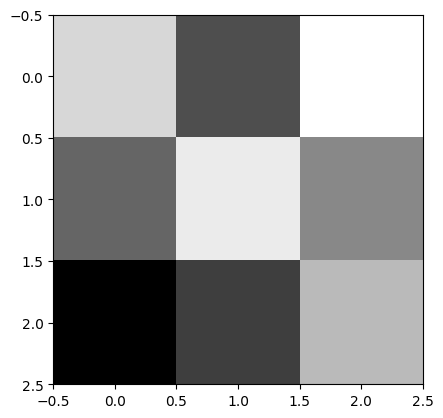

In [7]:
filters, biases = model.layers[0].get_weights()
for i in range(5):
    plt.imshow(filters[:,:,0,i], cmap='gray')
    plt.show()

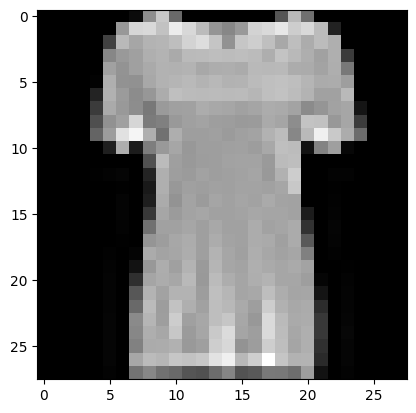

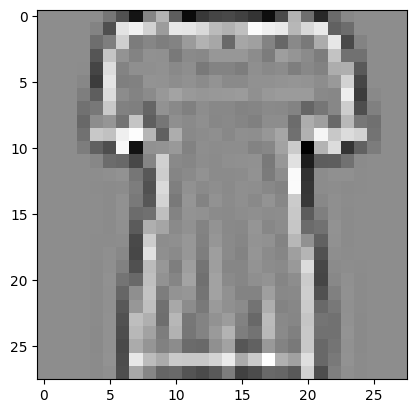

In [15]:
from scipy import signal

filt = np.array([
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]
])

im = train_X[10]


plt.imshow(im, cmap='gray')
plt.show()


ot = signal.convolve2d(im.reshape(28, 28), filt[0], boundary='symm', mode='same')

plt.imshow(ot, cmap='gray')
plt.show()

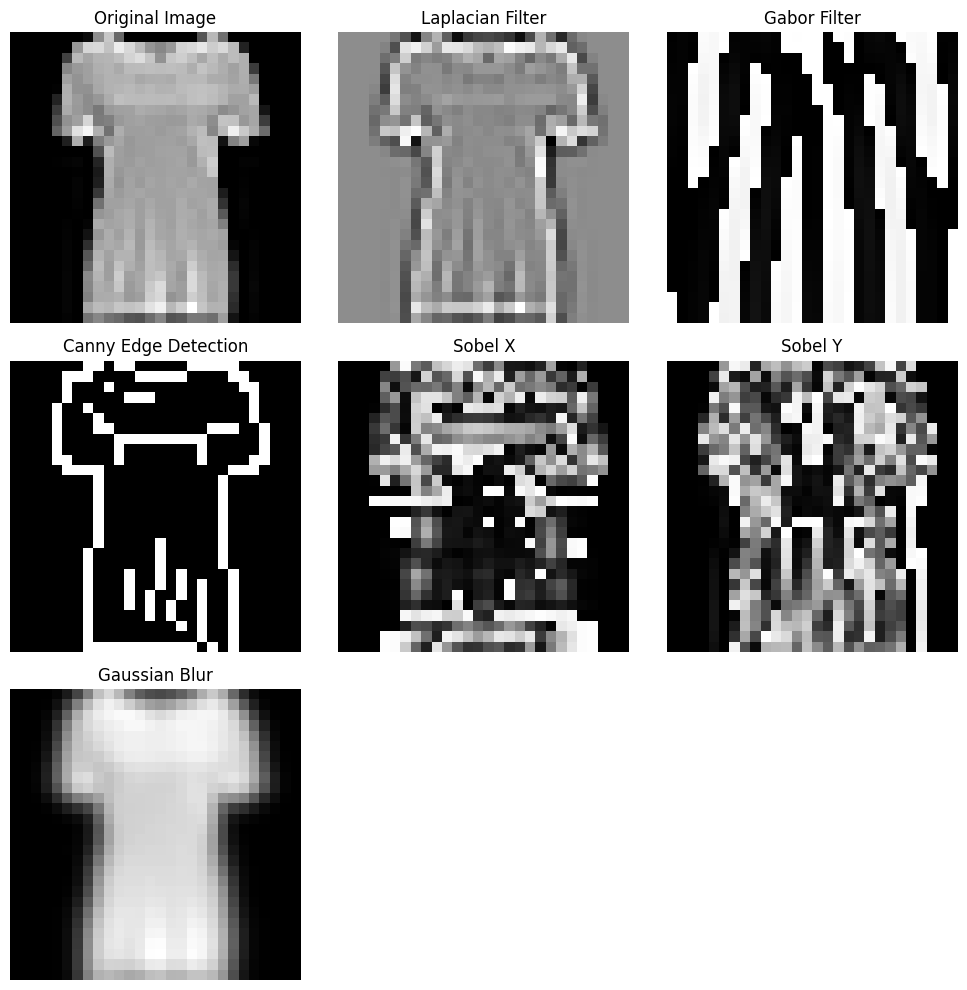

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import gaussian_filter, sobel
import cv2  # OpenCV for Canny edge detection
from skimage.filters import gabor  # Gabor filter

# Load Fashion-MNIST
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Select an image
im = train_images[10]

# Show original image
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# 1. **Laplacian Filter**
laplacian_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
laplacian_output = signal.convolve2d(im, laplacian_filter, boundary='symm', mode='same')

plt.subplot(3, 3, 2)
plt.imshow(laplacian_output, cmap='gray')
plt.title("Laplacian Filter")
plt.axis("off")

# 2. **Gabor Filter**
gabor_output, _ = gabor(im, frequency=0.2)

plt.subplot(3, 3, 3)
plt.imshow(gabor_output, cmap='gray')
plt.title("Gabor Filter")
plt.axis("off")

# 3. **Canny Edge Detection**
canny_output = cv2.Canny(im, 50, 150)  # Low and high threshold

plt.subplot(3, 3, 4)
plt.imshow(canny_output, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

# 4. **Sobel Edge Detection (X-direction)**
sobel_x = sobel(im, axis=0)

plt.subplot(3, 3, 5)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

# 5. **Sobel Edge Detection (Y-direction)**
sobel_y = sobel(im, axis=1)

plt.subplot(3, 3, 6)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

# 6. **Gaussian Blur (Smooth image)**
gaussian_blur = gaussian_filter(im, sigma=1)

plt.subplot(3, 3, 7)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis("off")

plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

#  Build Fully Connected Dense Network
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Convert 28x28 image to 1D
    Dense(128, activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes (output layer)
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Train Model
history = model.fit(train_X1, train_Y_one_hot,
                    validation_data=(val_X, val_Y_Onehot),
                    epochs=50, batch_size=16, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.1596 - loss: 2.3568 - val_accuracy: 0.2800 - val_loss: 1.9895
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3031 - loss: 2.0001 - val_accuracy: 0.3800 - val_loss: 1.7556
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3373 - loss: 1.7589 - val_accuracy: 0.5000 - val_loss: 1.5840
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3566 - loss: 1.6764 - val_accuracy: 0.5400 - val_loss: 1.4609
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5330 - loss: 1.4596 - val_accuracy: 0.6200 - val_loss: 1.3730
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6030 - loss: 1.2959 - val_accuracy: 0.6400 - val_loss: 1.2800
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5629 - loss: 1.1959 - val_accuracy: 0.6600 - val_loss: 1.2134
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6208 - loss: 1.1389 - val_accuracy: 0.6600 - val_loss: 1.0850
Epoch 9/50


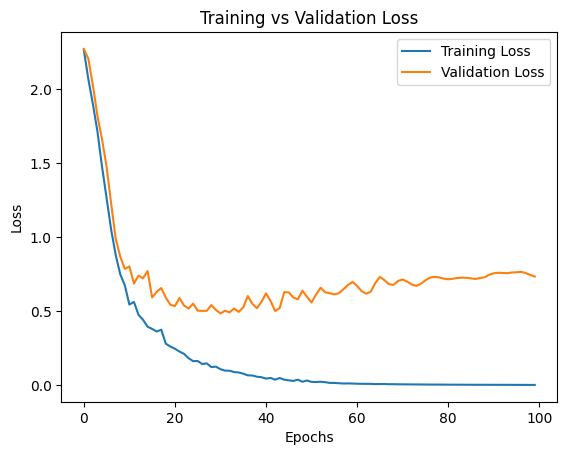

In [9]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [10]:
#Test Model on Test Set
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7006 - loss: 1.5141
Test Accuracy: 0.7007


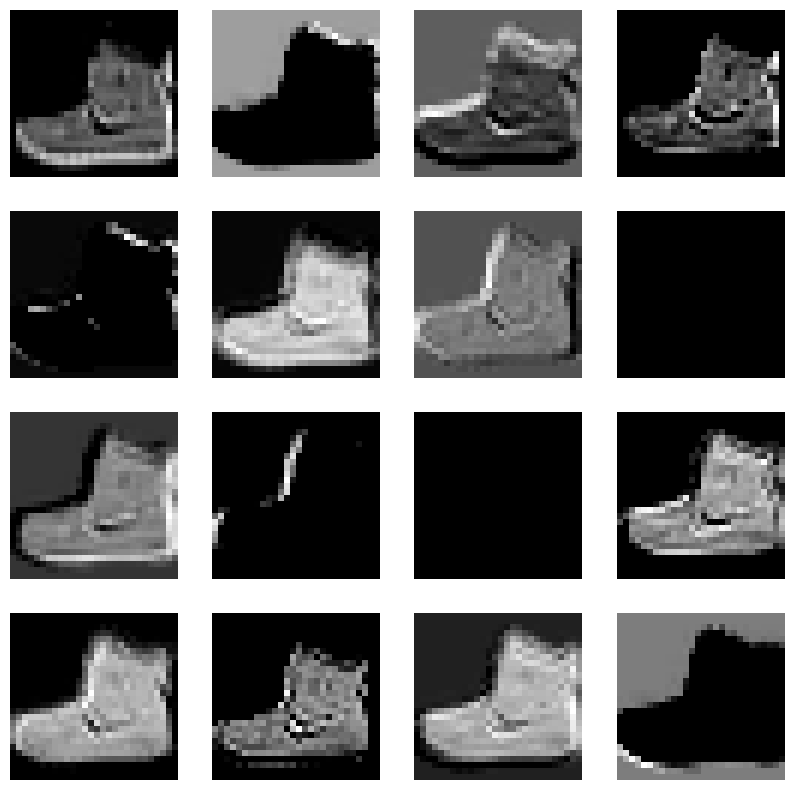

Epoch [1/5], Loss: 0.4865
Epoch [2/5], Loss: 0.1965
Epoch [3/5], Loss: 0.3019
Epoch [4/5], Loss: 0.1759
Epoch [5/5], Loss: 0.1916


In [13]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from torch.utils.data import Dataset, DataLoader

# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape dataset
train_images = train_images.astype(np.float32) / 255.0  # Normalize to [0,1]
test_images = test_images.astype(np.float32) / 255.0

# Define Custom PyTorch Dataset
class FashionMNISTDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = np.expand_dims(self.images[idx], axis=0)  # Add channel dimension (1, 28, 28)
        label = self.labels[idx]
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# Create DataLoader
train_dataset = FashionMNISTDataset(train_images, train_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define CNN Model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionCNN().to(device)

# Feature Map Visualization
def visualize_feature_maps(model, image):
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    model.eval()

    with torch.no_grad():
        x = model.conv1(image)
        x = F.relu(x)

    for i in range(16):
        ax = axes[i // 4, i % 4]
        ax.imshow(x[0, i].cpu().numpy(), cmap="gray")
        ax.axis("off")

    plt.show()

# Get one sample image
image, _ = train_dataset[0]
visualize_feature_maps(model, image)

# Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(model.state_dict(), "fashion_cnn.pth")
